In [2]:
library(readr)
library(dplyr)
library(stringr)
library(lfe)
library(ggsci)
library(lubridate)
library(ggplot2)
library(doMC)
library(gridExtra)
library(ggpubr)
library(stargazer)
registerDoMC(4)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [3]:
fp <- '/pool001/mfzhao/'
df <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_xgr.RDS'))

In [4]:
cns <- colnames(df)
cns

[1] "key"                    "date"                   "n"                     
  [4] "cluster"                "fold"                   "mcbgv.r"               
  [7] "pnchd.r"                "pgt1hafh.r"             "ppthlt75.r"            
 [10] "pgt2kmt.r"              "p1sdp.r"                "p2shp.r"               
 [13] "p3rop.r"                "p1sdpDSS.r"             "p2shpDSS.r"            
 [16] "p3ropDSS.r"             "stalter_mcbgv.r"        "stalter_pnchd.r"       
 [19] "stalter_pgt1hafh.r"     "stalter_ppthlt75.r"     "stalter_pgt2kmt.r"     
 [22] "stalter_p1sdp.r"        "stalter_p2shp.r"        "stalter_p3rop.r"       
 [25] "stalter_p1sdpDSS.r"     "stalter_p2shpDSS.r"     "stalter_p3ropDSS.r"    
 [28] "stalter_prcp01.r"       "stalter_prcp02.r"       "stalter_prcp03.r"      
 [31] "stalter_prcp04.r"       "stalter_prcp05.r"       "stalter_prcp06.r"      
 [34] "stalter_prcp07.r"       "stalter_prcp08.r"       "stalter_prcp09.r"      
 [37] "stalter_prcp10.r"       "stalter_tmax02.r"       "stalter_tmax03.r"      
 [40] "stalter_tmax04.r"       "stalter_tmax05.r"       "stalter_tmax06.r"      
 [43] "stalter_tmax07.r"       "stalter_tmax08.r"       "stalter_tmax09.r"      
 [46] "stalter_tmax10.r"       "alter_mcbgv.r"          "alter_pnchd.r"         
 [49] "alter_pgt1hafh.r"       "alter_ppthlt75.r"       "alter_pgt2kmt.r"       
 [52] "alter_p1sdp.r"          "alter_p2shp.r"          "alter_p3rop.r"         
 [55] "alter_p1sdpDSS.r"       "alter_p2shpDSS.r"       "alter_p3ropDSS.r"      
 [58] "alter_prcp01.r"         "alter_prcp02.r"         "alter_prcp03.r"        
 [61] "alter_prcp04.r"         "alter_prcp05.r"         "alter_prcp06.r"        
 [64] "alter_prcp07.r"         "alter_prcp08.r"         "alter_prcp09.r"        
 [67] "alter_prcp10.r"         "alter_tmax02.r"         "alter_tmax03.r"        
 [70] "alter_tmax04.r"         "alter_tmax05.r"         "alter_tmax06.r"        
 [73] "alter_tmax07.r"         "alter_tmax08.r"         "alter_tmax09.r"        
 [76] "alter_tmax10.r"         "log_mcbgv.r"            "log_pnchd.r"           
 [79] "log_pgt1hafh.r"         "log_ppthlt75.r"         "log_pgt2kmt.r"         
 [82] "log_stalter_mcbgv.r"    "log_stalter_pnchd.r"    "log_stalter_pgt1hafh.r"
 [85] "log_stalter_ppthlt75.r" "log_stalter_pgt2kmt.r"  "log_alter_mcbgv.r"     
 [88] "log_alter_pnchd.r"      "log_alter_pgt1hafh.r"   "log_alter_ppthlt75.r"  
 [91] "log_alter_pgt2kmt.r"    "p1sdp_l01.r"            "p2shp_l01.r"           
 [94] "p3rop_l01.r"            "stalter_p1sdp_l01.r"    "stalter_p2shp_l01.r"   
 [97] "stalter_p3rop_l01.r"    "p1sdp_l02.r"            "p2shp_l02.r"           
[100] "p3rop_l02.r"            "stalter_p1sdp_l02.r"    "stalter_p2shp_l02.r"   
[103] "stalter_p3rop_l02.r"    "p1sdp_l03.r"            "p2shp_l03.r"           
[106] "p3rop_l03.r"            "stalter_p1sdp_l03.r"    "stalter_p2shp_l03.r"   
[109] "stalter_p3rop_l03.r"    "p1sdp_l04.r"            "p2shp_l04.r"           
[112] "p3rop_l04.r"            "stalter_p1sdp_l04.r"    "stalter_p2shp_l04.r"   
[115] "stalter_p3rop_l04.r"    "p1sdp_l05.r"            "p2shp_l05.r"           
[118] "p3rop_l05.r"            "stalter_p1sdp_l05.r"    "stalter_p2shp_l05.r"   
[121] "stalter_p3rop_l05.r"    "p1sdp_l06.r"            "p2shp_l06.r"           
[124] "p3rop_l06.r"            "stalter_p1sdp_l06.r"    "stalter_p2shp_l06.r"   
[127] "stalter_p3rop_l06.r"    "p1sdp_l07.r"            "p2shp_l07.r"           
[130] "p3rop_l07.r"            "stalter_p1sdp_l07.r"    "stalter_p2shp_l07.r"   
[133] "stalter_p3rop_l07.r"    "p1sdp_l08.r"            "p2shp_l08.r"           
[136] "p3rop_l08.r"            "stalter_p1sdp_l08.r"    "stalter_p2shp_l08.r"   
[139] "stalter_p3rop_l08.r"    "p1sdp_l09.r"            "p2shp_l09.r"           
[142] "p3rop_l09.r"            "stalter_p1sdp_l09.r"    "stalter_p2shp_l09.r"   
[145] "stalter_p3rop_l09.r"    "p1sdp_l10.r"            "p2shp_l10.r"           
[148] "p3rop_l10.r"            "s

In [35]:
ldvs <- c('log_mcbgv.r', 'log_pgt2kmt.r', 'log_pgt1hafh.r', 'log_pnchd.r')

In [6]:
get_coefs <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]\\.r$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('alter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    as.data.frame(summary(model)$coef) %>%
        mutate(var   = rownames(.),
               dv    = dv,
               model = ifelse(vars == f1, 'base', 'ap'),
               model = ifelse(ivmod, str_c(model, ' + iv'), model)) %>%
        filter(!str_detect(var, '[pPtT][rRmM][cCaA][pPxX]')) %>%
        select(7, 6, 5, 1, 2, 3, 4) -> out
    
    colnames(out) <- c('model', 'dv', 'var', 'estimate', 'se', 't', 'p-val')
    return(out)
}

In [7]:
f1 <- ' p1sdp.r + p2shp.r + p3rop.r '  
f2 <- ' p1sdp.r + p2shp.r + p3rop.r + stalter_p1sdp.r + stalter_p2shp.r + stalter_p3rop.r '

In [52]:
p1ll  <- cns[str_detect(cns, '^p1sdp_[lm]0[12345]')]
p2ll  <- cns[str_detect(cns, '^p2shp_[lm]0[12345]')]
p3ll  <- cns[str_detect(cns, '^p3rop_[lm]0[12345]')]
sp1ll <- cns[str_detect(cns, '^stalter_p1sdp_[lm]0[12345]')]
sp2ll <- cns[str_detect(cns, '^stalter_p2shp_[lm]0[12345]')]
sp3ll <- cns[str_detect(cns, '^stalter_p3rop_[lm]0[12345]')]

In [53]:
f1 <- str_c(' p1sdp.r + p2shp.r + p3rop.r + ', 
            str_c(p1ll, collapse = ' + '), ' + ',
            str_c(p2ll, collapse = ' + '), ' + ',
            str_c(p3ll, collapse = ' + '))

f2 <- str_c(' p1sdp.r + p2shp.r + p3rop.r + stalter_p1sdp.r + stalter_p2shp.r + stalter_p3rop.r + ',
            str_c(p1ll, collapse = ' + '), ' + ',
            str_c(p2ll, collapse = ' + '), ' + ',
            str_c(p3ll, collapse = ' + '), ' + ', 
            str_c(sp1ll, collapse = ' + '), ' + ',
            str_c(sp2ll, collapse = ' + '), ' + ',
            str_c(sp3ll, collapse = ' + '))

In [54]:
foreach(dv = ldvs, .combine = rbind) %dopar% 
    get_coefs(dv, f2, ivmod = F) -> coefs

Warning message in ifelse(str_detect(var, "_l[01][0-9]"), as.numeric(str_sub(var, :
“NAs introduced by coercion”
Warning message in ifelse(str_detect(var, "_m[01][0-9]"), -1 * as.numeric(str_sub(var, :
“NAs introduced by coercion”


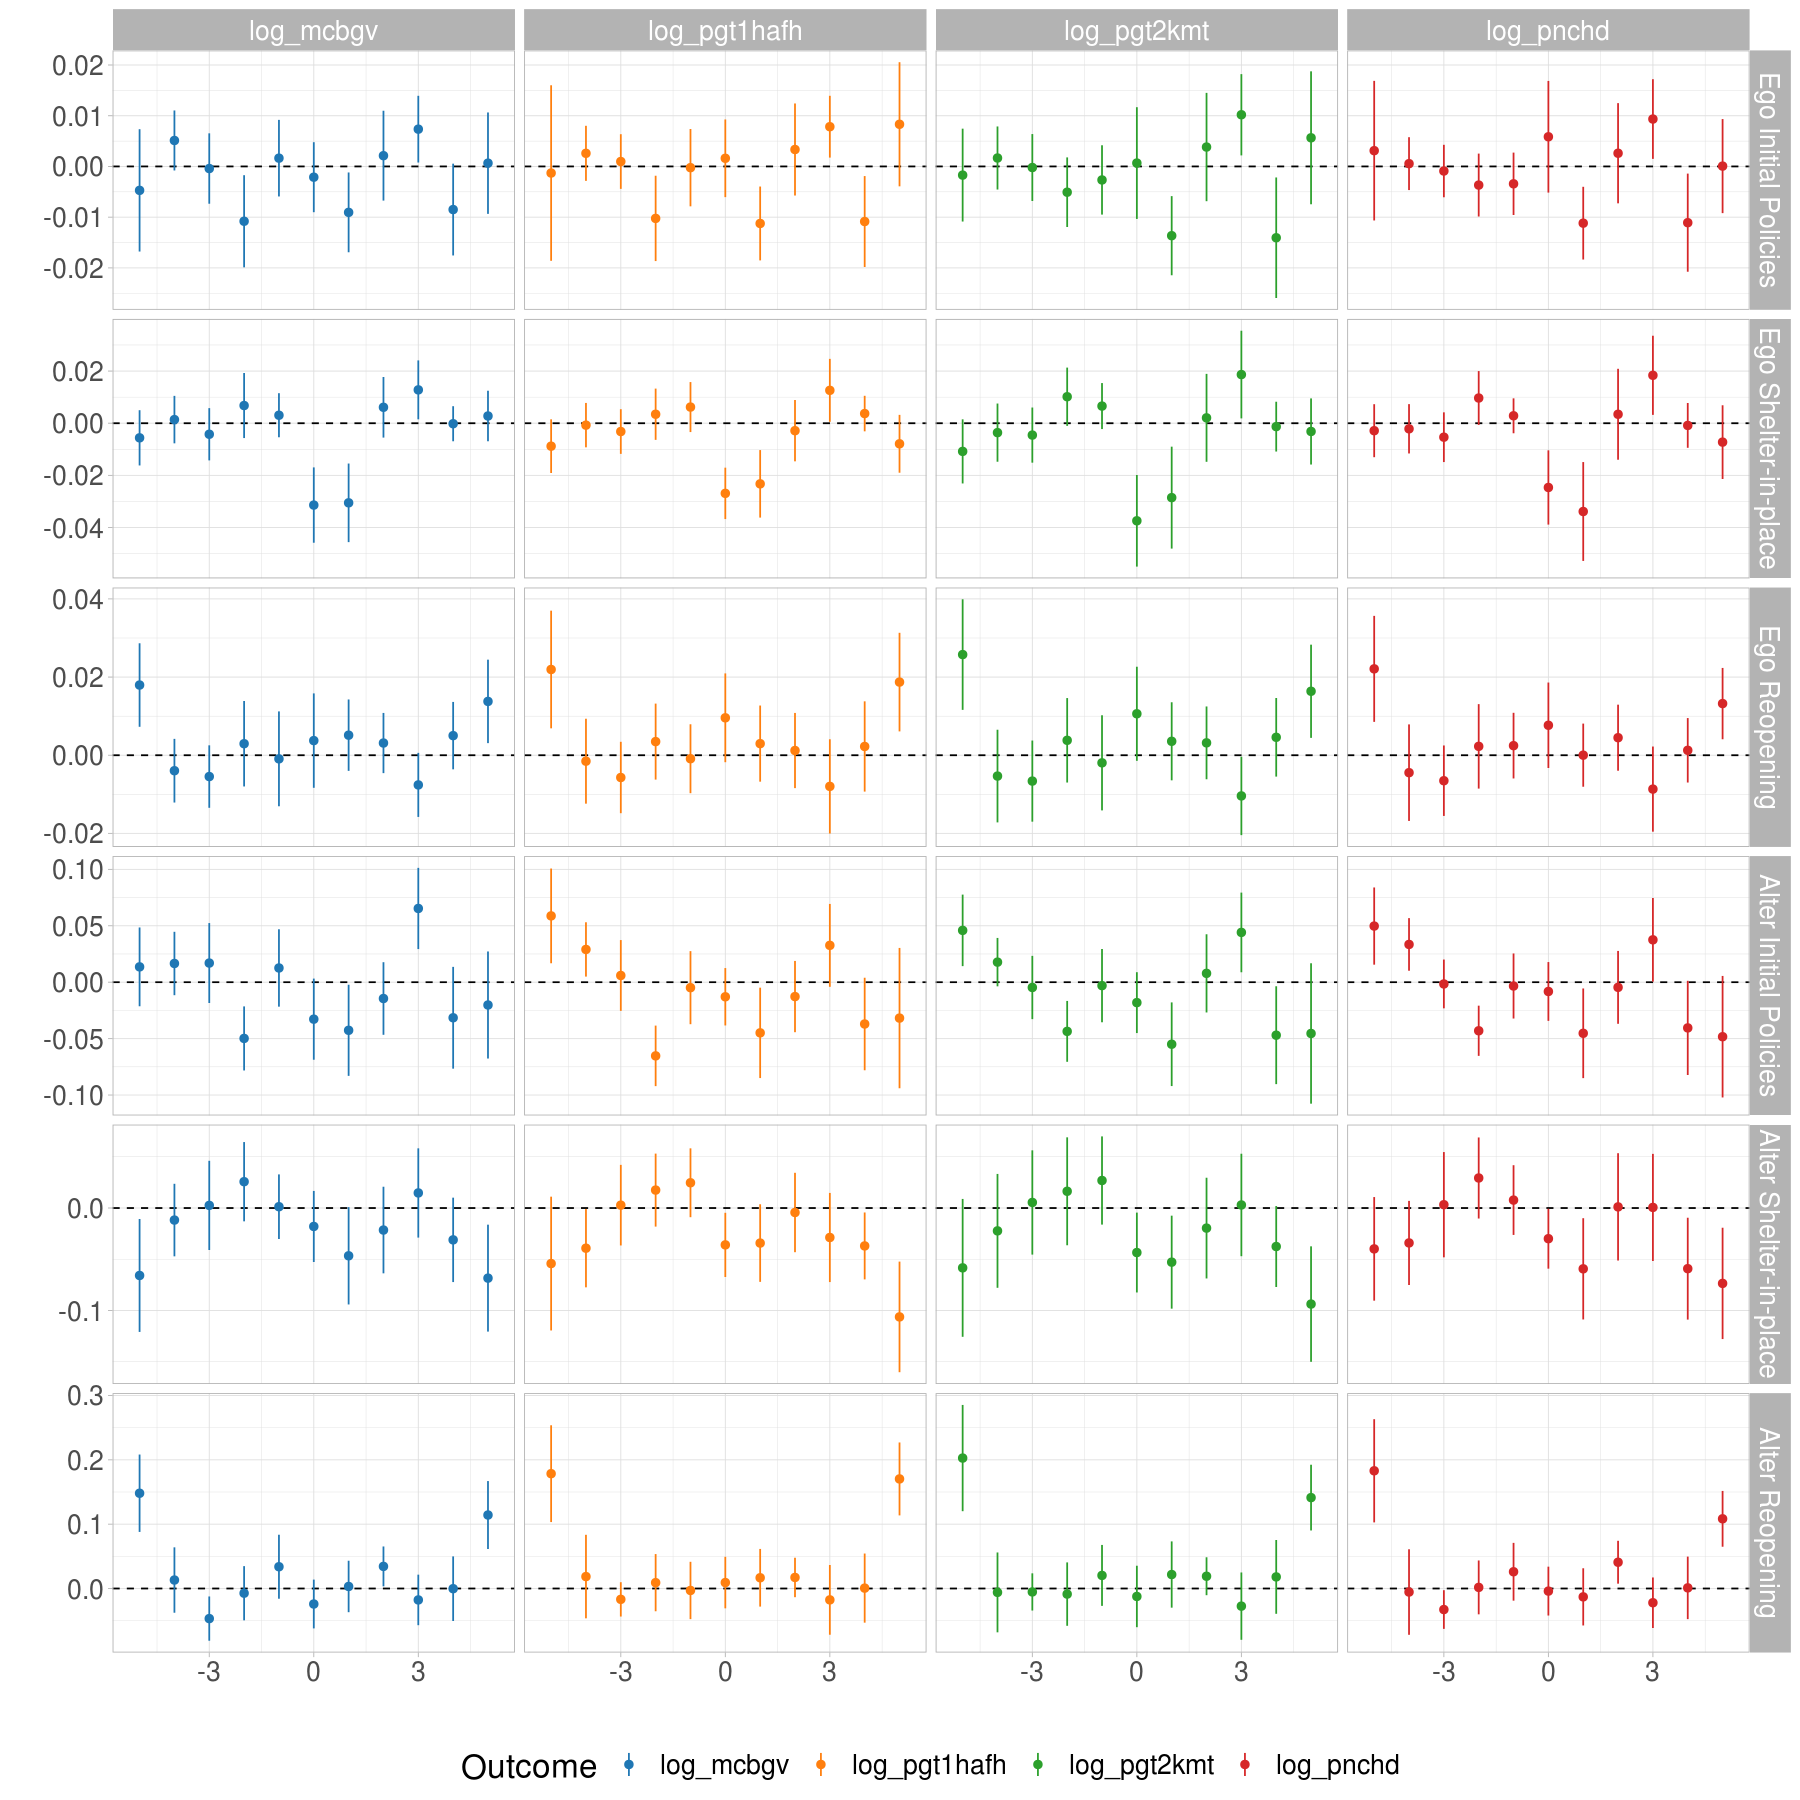

In [58]:
vns <- c('p1sdp'         = "Ego Initial Policies",
         'p2shp'         = "Ego Shelter-in-place",
         'p3rop'         = "Ego Reopening",
         'stalter_p1sdp' = 'Alter Initial Policies',
         'stalter_p2shp' = 'Alter Shelter-in-place',
         'stalter_p3rop' = 'Alter Reopening',
         'log_mcbgv'     = 'log_mcbgv', 
         'log_pgt2kmt'   = 'log_pgt2kmt', 
         'log_pgt1hafh'  = 'log_pgt1hafh', 
         'log_pnchd'     = 'log_pnchd')

options(repr.plot.width=15, repr.plot.height=15)

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           ll  = ifelse(str_detect(var, '_l[01][0-9]'), as.numeric(str_sub(var, -2, -1)), 
                        ifelse(str_detect(var, '_m[01][0-9]'), -1 * as.numeric(str_sub(var, -2, -1)), 0)),
           var = str_replace(var, '_[lm][01][0-9]', '')) %>%
    filter(model == 'ap') %>%
    ggplot(aes(x = ll, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(var~dv, scales = 'free_y', labeller = as_labeller(vns)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p 

p

ggsave('/home/mfzhao/SI_plots/rc2a_ll_main.pdf', p, device = 'pdf', width = 6.5, height = 6.5, scale = 2)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    ggtitle('A') + 
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'None',
          plot.margin = margin(0, 10, 0, 20)) -> p2a

p2a

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
apiv %>%
    filter(var == 'Peer Effect') %>%
    select(dv, pfxCoef = estimate, pfxSe = se) %>%
    left_join(apiv %>%
              filter(!str_detect(var, 'stalter'),
                     var != 'Peer Effect')) %>%
    mutate(estimate = estimate * pfxCoef,
           se       = estimate * pfxSe,
           var      = str_c('pfx_', var)) %>%
    select(model, dv, var, estimate, se, t, `p-val`) %>%
    bind_rows(apiv %>%
              filter(var != 'Peer Effect',
                     !str_detect(var, 'stalter'))) %>%
    mutate(policy = str_sub(var, -5, -1),
           type   = ifelse(str_detect(var, 'pfx'), 'Peer Effect',
                           ifelse(str_detect(var, 'stalter'), 'Alter Policy', 'Ego Policy')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = type, y = estimate, color = dv)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(policy~., scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    ggtitle('B') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'None', 
          plot.margin = margin(0, 10, 0, 20)) -> p2b

p2b
#ggsave('/home/mfzhao/p2b.svg', p2b, device = 'svg', width = 2, height = 5, scale = 2)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> leg


get_legend(leg) %>%
    as_ggplot() -> leg

In [ ]:
p2a + theme(plot.title = element_text(hjust = -0.05, vjust = -1)) -> p2a
p2b + theme(plot.title = element_text(hjust = -0.05, vjust = -1)) -> p2b

In [ ]:
p2a + theme(plot.title = element_text(size = 30, hjust = -0.075, vjust = -1.5)) -> p2a
p2b + theme(plot.title = element_text(size = 30, hjust = -0.25, vjust = -1.5)) -> p2b
lay <- rbind(c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             rep(3, 24))
grid.arrange(grobs = list(p2a, p2b, leg), layout_matrix = lay) -> p2

ggsave('/home/mfzhao/p2.pdf', p2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [ ]:
ggsave('/home/mfzhao/p2.pdf', p2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [ ]:
ggsave('/home/mfzhao/p2leg.svg', leg, device = 'svg', width = 6.5, height = 5, scale = 2)